In [208]:
from openpyxl import *
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0) #Set size of inlince plot

wb = load_workbook('Sæternbekken.xlsx')
ws = wb.active

year = [int(cell.value) for row in ws.iter_rows('A2:A37') for cell in row]
Q    = [cell.value for row in ws.iter_rows('B2:B37') for cell in row]

for i in range(0,len(Q)):
    if Q[i] == 'NA':
        Q[i] = float('nan')
    else:
        Q[i] = float(Q[i])

In [209]:
year = np.array(year); Q = np.array(Q)

In [210]:
Qmea = np.nanmean(Q)
Qmed = np.median(Q[~np.isnan(Q)]) #Ignore Nan values.
Qmode = stats.mode(Q)
Qstd = np.nanstd(Q)
Qvar = Qstd**2
QCV = Qstd/Qmea

In [211]:
bins = np.linspace(0,0.23,24)
Q[0] = 0.049

#n=histc(Q,bins)
F = np.isfinite(Q)
nvals = sum(F)

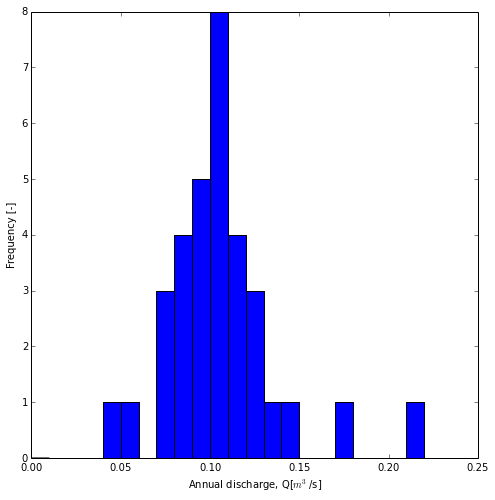

In [212]:
n, bins, patches = plt.hist(Q,bins)
Rn = n/(nvals+1)
plt.xlabel('Annual discharge, Q[$m^3$/s]')
plt.ylabel('Frequency [-]')
plt.show()

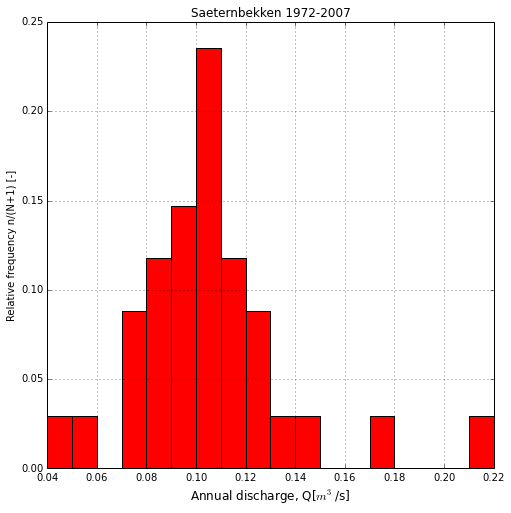

In [213]:
import numpy as np
import matplotlib.pyplot as plt

N = len(Rn) #Number of bars

ind = bins[:-1]  # the x locations for the groups
width = 0.01     # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, Rn, width, color='r')
plt.xlabel('Annual discharge, Q[$m^3$/s]',fontsize=12)
plt.ylabel('Relative frequency n/(N+1) [-]')
plt.title('Saeternbekken 1972-2007',fontsize=12)
plt.grid()
plt.show()

In [214]:
#c) Create a diagram of the cumulative probability distribution
#using Weibulls plotting formula. Use the diagram to find

#First we need to sort the (finite) entries in our Q vector.
#As such we exclude missing data.

F = np.isfinite(Q) #isfinite=isnotnan
Q = Q[F] #Redefine Q to only include these values.
Q = np.sort(Q) #The sort function sorts a vector to be in ascending order.

#Employ Weibull's formula. p=i/(N+1); Note the +1 accounts
#for the fact that extreme values may not have occured in our series.

N = len(Q)
i = np.arange(1,N+1)
p = np.divide(i,float(N+1))

# To visualize this we need to bin the data.
# And calculate the cumulative histogram.
# (This the binned version of the Weibull formula so long as we remember
# to take the cumulative sum and divide by N+1).

nc = np.cumsum(n)
Rnc = nc/(nvals+1)

In [215]:
#Combine the two results in a bar plot.

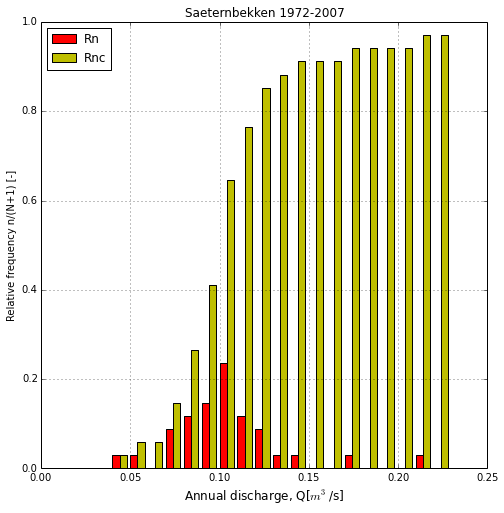

In [216]:
ind = bins[:-1]  # the x locations for the groups
width = 0.004     # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, Rn, width, color='r')
rects2 = ax.bar(ind+width,Rnc,width,color='y')
ax.legend((rects1[0], rects2[0]), ('Rn', 'Rnc'),loc='upper left')
plt.xlabel('Annual discharge, Q[$m^3$/s]',fontsize=12)
plt.ylabel('Relative frequency n/(N+1) [-]')
plt.title('Saeternbekken 1972-2007',fontsize=12)
plt.grid()
plt.show()